<a href="https://colab.research.google.com/github/GauthamHari000/NASAJPL_AsteroidProject/blob/main/Asteroid_Research_NASA_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import csv
from google.colab import drive
from sklearn.metrics import accuracy_score   
from collections import Counter
import sys
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics



In [ ]:
# #@title Run this to import libraries and your data! { display-mode: "form" }
# #Please run `pip install pandas` in the terminal if the below doesn't work for you
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import os # Good for navigating your computer's files 
import gdown

gdown.download('https://drive.google.com/uc?id=1hvJi36ofxKr7yCwE4GGleLu0JMp8uVC-', 'neodata.csv', False)
gdown.download('https://drive.google.com/uc?id=1aG2YK_z_1fYMZl3cMJuEV5AAh0PDBDyv','phas.csv',False)
gdown.download('https://drive.google.com/uc?id=1r2yQn37keGj1cBae-1_zvLcqupFjygm1','CNEOS.csv',False)
gdown.download('https://drive.google.com/uc?id=11wH4i3uJWaCxYlnlfcIVcB5VihiffNU2','shortCNEOS.csv',False)
gdown.download('https://drive.google.com/uc?id=1WmcGnYIUital69_8v4ug8GuyYYKZvHk1','300CNEOS.csv',False)



Downloading...
From: https://drive.google.com/uc?id=1hvJi36ofxKr7yCwE4GGleLu0JMp8uVC-
To: /content/neodata.csv
100%|██████████| 130k/130k [00:00<00:00, 58.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aG2YK_z_1fYMZl3cMJuEV5AAh0PDBDyv
To: /content/phas.csv
100%|██████████| 84.6k/84.6k [00:00<00:00, 74.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r2yQn37keGj1cBae-1_zvLcqupFjygm1
To: /content/CNEOS.csv
100%|██████████| 101k/101k [00:00<00:00, 81.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=11wH4i3uJWaCxYlnlfcIVcB5VihiffNU2
To: /content/shortCNEOS.csv
100%|██████████| 6.54k/6.54k [00:00<00:00, 2.84MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WmcGnYIUital69_8v4ug8GuyYYKZvHk1
To: /content/300CNEOS.csv
100%|██████████| 19.2k/19.2k [00:00<00:00, 35.7MB/s]


'300CNEOS.csv'

In [ ]:
import csv
import requests
import json
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)
from sklearn.metrics import accuracy_score   # Great for creating quick ML models
cneosList=[]
dataframe = pd.read_csv('300CNEOS.csv')
dataframe=dataframe[['Impact Probability (cumulative)','H (mag)','Estimated Diameter (km)','Vinfinity (km/s)']]
dataframe.head(10)
with open('300CNEOS.csv', 'r') as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    if(row[0] != 'object designation'):
      name=row[0]
      name=name.replace('(','',1)
      name=name.replace(')','',1)
      name=name.replace(' ','',3)
      print(name)
      r = requests.get("https://ssd-api.jpl.nasa.gov/sbdb.api?sstr="+name) 
      rJson=r.json()
      cneosList.append(rJson)





  # rawNeoData = pd.read_csv('neodata.csv')
# rawPhasData = pd.read_csv('phas.csv')

# print(rawNeoData.head(10))
# print(rawPhasData.head(10))




# neoOrbitalData = rawNeoData[['spkid','neo']]
# neoPhysicalData = rawNeoData[['spkid','neo']]
# neoPhysicalData = rawNeoData[['spkid','neo']]


# # neoPhysicalData = rawNeoData[['spkid','']]
# {'object': 
#  {'neo': True, 
#   'orbit_class': {'name': 'Aten', 'code': 'ATE'}, 
#   'pha': False, 
#   'spkid': '3324656', 
#   'kind': 'au', 
#   'orbit_id': '8',
#   'fullname': '(2006 DM63)', 
#   'des': '2006 DM63', 
#   'prefix': None}, 
#  'signature': {'source': 'NASA/JPL Small-Body Database (SBDB) API', 'version': '1.3'}, 
#  'orbit': {'source': 'JPL', 'cov_epoch': '2453794.5', 'moid_jup': '4.38', 't_jup': '8.114', 'condition_code': '8', 'not_valid_before': None, 'rms': '0.58', 'model_pars': [], 'orbit_id': '8', 'producer': 'Otto Matic', 'first_obs': '2006-02-27', 'soln_date': '2021-04-14 23:32:21', 'two_body': None, 'epoch': '2453794.5', 'elements': [{'value': '0.497', 'sigma': '0.002', 'name': 'e', 'title': 'eccentricity', 'label': 'e', 'units': None}, {'value': '0.696', 'sigma': '0.00075', 'name': 'a', 'title': 'semi-major axis', 'label': 'a', 'units': 'au'}, {'value': '0.35', 'sigma': '0.0018', 'name': 'q', 'title': 'perihelion distance', 'label': 'q', 'units': 'au'}, {'value': '1.78', 'sigma': '0.01', 'name': 'i', 'title': 'inclination; angle with respect to x-y ecliptic plane', 'label': 'i', 'units': 'deg'}, {'value': '336', 'sigma': '0.0038', 'name': 'om', 'title': 'longitude of the ascending node', 'label': 'node', 'units': 'deg'}, {'value': '17.4', 'sigma': '0.018', 'name': 'w', 'title': 'argument of perihelion', 'label': 'peri', 'units': 'deg'}, {'value': '140', 'sigma': '0.12', 'name': 'ma', 'title': 'mean anomaly', 'label': 'M', 'units': 'deg'}, {'value': '2453711.912', 'sigma': '0.2', 'name': 'tp', 'title': 'time of perihelion passage', 'label': 'tp', 'units': 'TDB'}, {'value': '212', 'sigma': '0.34', 'name': 'per', 'title': 'sidereal orbital period', 'label': 'period', 'units': 'd'}, {'value': '1.7', 'sigma': '0.0027', 'name': 'n', 'title': 'mean motion', 'label': 'n', 'units': 'deg/d'}, {'value': '1.04', 'sigma': '0.0011', 'name': 'ad', 'title': 'aphelion distance', 'label': 'Q', 'units': 'au'}], 'equinox': 'J2000', 'data_arc': '1', 'not_valid_after': None, 'n_del_obs_used': None, 'sb_used': 'SB441-N16', 'n_obs_used': '19', 'comment': None, 'pe_used': 'DE441', 'last_obs': '2006-02-28', 'moid': '0.0007', 'n_dop_obs_used': None}
#  }


# #All NUMBERED NEOS

ObjectDesignation
1979XB
2000SG344
2007FT3
2021QM1
2021EU
2008JL3
2005ED224
2010RF12
2022EK4
2005QK76
2021GX9
2015JJ
2008UB7
2007DX40
2000SB45
2012QD8
2008EX5
2020FA5
2020VW
2017WT28
2020VV
2013VW13
2012HG2
2020OB
2009BE
2008CC71
2015YJ
2006DM63
2010GM23
2014GN1
2020KD3
2002RB182
2010CR5
2020MJ
2017LD
2006JY26
2021AM6
2010UK
2007KE4
2012VE77
2014MR26
1994GK
2008TE
2020US7
2021GE2
2008HJ
2014JU15
2006CM10
2016WG
2019LW4
2013TP4
2011DU9
2011BL45
2020CQ1
2005XA8
2008ST7
2021UL7
2008EZ84
2019LU1
2011EB74
2009JF1
2022DB2
2018TY4
2016RD34
2018NJ
2018JD
2000WJ107
2018DQ
2010QG2
2012MF7
2019WG2
2021SU1
2014JU79
2007KO4
2020XF
2015XA378
2021VM1
2017SF20
2013GM3
2021TT1
2017PY26
2006HF6
2012BA77
2018GR4
2021QY3
2021YW
2014CR13
2007WP3
2014YN
2017FO63
2011UM169
2020JK
2016DK1
2020UE
2008YO2
2002MN
2017FO128
2011SO189
2022AE2
2014WA201
2017YM1
2020TY4
2017VL2
2007HB15
2020DJ1
2019QR3
2022AT2
2011CU46
2011OB26
2021UP
2012EK5
2010VQ
2018NW
2019TU
2016EO28
2011XC2
2010KV7
2020DF3
2017RV2
2011VG9
2012

In [ ]:
import math
import csv
import csv
from decimal import Decimal


currentList = []

eccentricity=[]
aSemiMajor=[]
perihelionQ=[]
inclination=[]
longAscending=[]
meanMotion=[]
aphelionDistance=[]
moid =[]
for i in range(1,len(cneosList)):
  eccentricity.append(float(cneosList[i]['orbit']['elements'][0]['value']))
  aSemiMajor.append(float(cneosList[i]['orbit']['elements'][1]['value']))
  perihelionQ.append(float(cneosList[i]['orbit']['elements'][2]['value']))
  inclination.append(float(cneosList[i]['orbit']['elements'][3]['value']))
  longAscending.append(float(cneosList[i]['orbit']['elements'][4]['value']))
  meanMotion.append(float(cneosList[i]['orbit']['elements'][9]['value']))
  aphelionDistance.append(float(cneosList[i]['orbit']['elements'][10]['value']))
  moid.append(float(cneosList[i]['orbit']['moid']))
  print(i)
print(eccentricity)
print(aSemiMajor)
print(perihelionQ)
print(inclination)
print(longAscending)
print(meanMotion)
print(aphelionDistance)
print(moid)


print(len(eccentricity))
print(len(aSemiMajor))
print(len(perihelionQ))
print(len(inclination))
print(len(longAscending))
print(len(meanMotion))
print(len(aphelionDistance))
print(len(moid))

dataframe['Eccentricity(e)'] = eccentricity
dataframe['Semi-Major Axis (a)'] = aSemiMajor
dataframe['Perihelion Distance (q)'] = perihelionQ
dataframe['Inclination'] = inclination
dataframe['Longitude of Ascending Node'] = longAscending
dataframe['Mean Motion'] = meanMotion
dataframe['Aphelion Distance'] = aphelionDistance
dataframe['MOID'] = moid

impactProbabilityPercentage=[]
for i in range(0,len(cneosList)-1):
  impactProbabilityPercentage.append(float(dataframe['Impact Probability (cumulative)'][i])*100)

dataframe['Impact Probability (percentage)']=impactProbabilityPercentage





# with open('neodata.csv', newline='') as f:
#     reader = csv.reader(f)
#     rawNeoDataList = list(reader) 




# print(rawNeoDataList)

# eccentricityList = rawNeoDataList[['e','a']]

# print(eccentricityList)
# with open('/neodata.csv', newline='') as csvfile:
#   data = csv.reader(csvfile, delimiter=' ', quotechar='|')
#   for row in data:
#      newRow =', '.join(row)
#      print(newRow.)     

# pow(10,3.1236 - 0.5*math.log(A,10) - 0.2*H)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
dataframe.head(297)
dataframe.to_csv('appendix.csv')


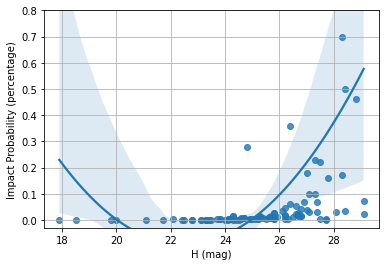

In [ ]:
e=sns.regplot( x = 'H (mag)', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=2,fit_reg=True)
e.set(ylim=(-0.03,0.8))
plt.grid()







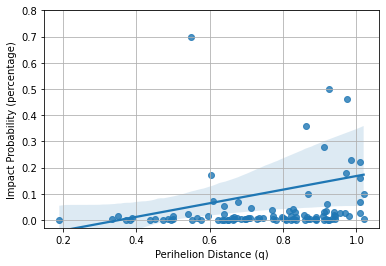

In [ ]:
e=sns.regplot( x = 'Perihelion Distance (q)', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=1,fit_reg=True)
e.set(ylim=(-0.03,0.8))
plt.grid()




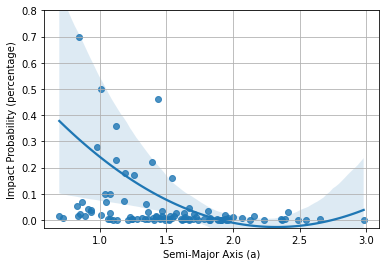

In [ ]:
a=sns.regplot( x = 'Semi-Major Axis (a)', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=2,fit_reg=True)
a.set(ylim=(-0.03,0.8))
plt.grid()

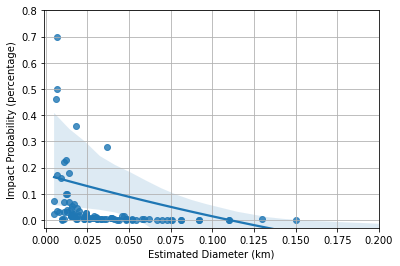

In [ ]:
a=sns.regplot( x = 'Estimated Diameter (km)', y = 'Impact Probability (percentage)', data = dataframe.head(100), order=2, fit_reg=True)
a.set(ylim=(-0.03,0.8))
a.set(xlim=(-0.001,0.2))

plt.grid()

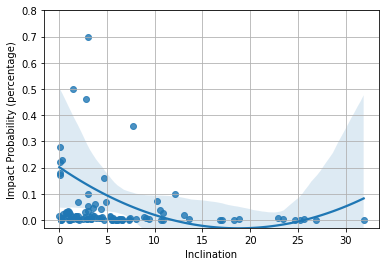

In [ ]:
a=sns.regplot( x = 'Inclination', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=2,fit_reg=True)
a.set(ylim=(-0.03,0.8))
plt.grid()

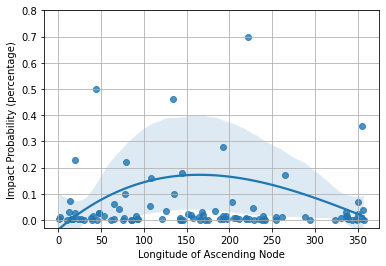

In [ ]:
a=sns.regplot( x = 'Longitude of Ascending Node', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=3,fit_reg=True)
a.set(ylim=(-0.03,0.8))
plt.grid()

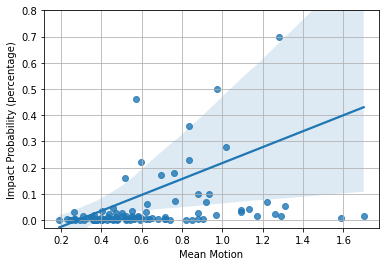

In [ ]:
a=sns.regplot( x = 'Mean Motion', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=1,fit_reg=True)
a.set(ylim=(-0.03,0.8))
plt.grid()

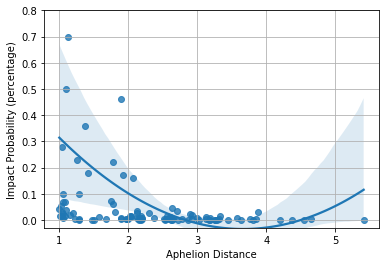

In [ ]:
a=sns.regplot( x = 'Aphelion Distance', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=2,fit_reg=True)
a.set(ylim=(-0.03,0.8))
plt.grid()

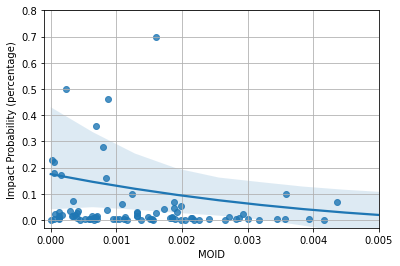

In [ ]:
a=sns.regplot( x = 'MOID', y = 'Impact Probability (percentage)', data = dataframe.head(100),order=4,fit_reg=True)
a.set(ylim=(-0.03,0.8))
a.set(xlim=(-0.0001,0.005))

plt.grid()

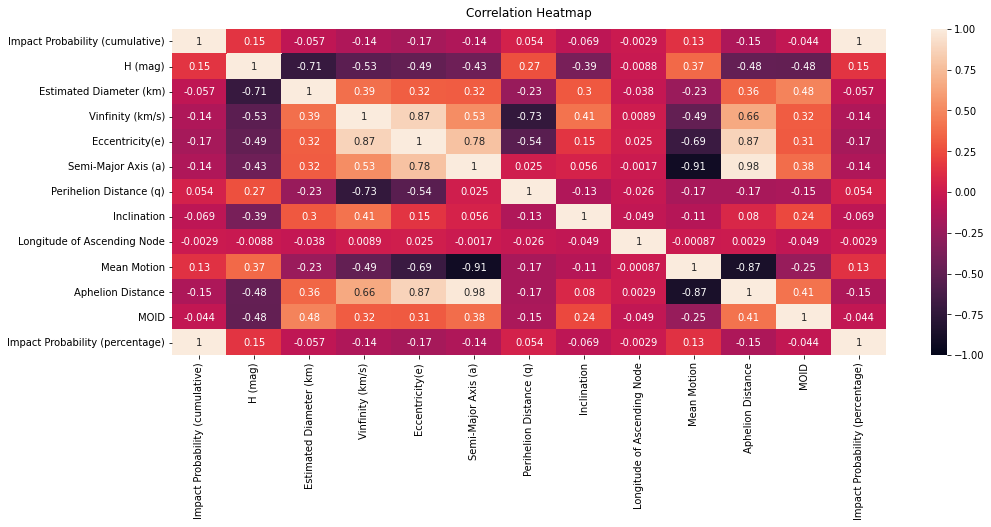

In [ ]:
# import pandas as pd
plt.figure(figsize=(16, 6))

heatmap=sns.heatmap(dataframe.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# df=pd.DataFrame(data,columns=['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp.cal', 'per', 'rot_per', 'GM', 'BV', 'UB', 'epoch'])
# corrMatrix = df.corr();
# print(corrMatrix)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)
print(train_df.shape[0])

237


In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import utils
from numpy import mean
from numpy import std

from numpy import absolute

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge


X = ['H (mag)','Vinfinity (km/s)','Eccentricity(e)','Mean Motion','Aphelion Distance','Semi-Major Axis (a)']
y = 'Impact Probability (percentage)'
# sns.catplot( x = 'Perihelion Distance (q)', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)

# sns.catplot( x = 'Eccentricity(e)', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Inclination', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Longitude of Ascending Node', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Mean Motion', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Aphelion Distance', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'MOID', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)

# 1. Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:
X_train=train_df[X]
y_train=train_df[y]
print(len(X_train))

X_test=test_df[X]
y_test=test_df[y]
# 3. Initialize the model object
ridgeModel = Ridge(alpha=0.58)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(ridgeModel, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# # 4. Fit the model to the training data
# logreg_model.fit(X_train,y_train)
# # 5. Use this trained model to predict on the test data
# y_pred = logreg_model.predict(X_test)

# test_df['predicted'] = y_pred.squeeze()
# e=sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df)
# e.set(ylim=(-0.0010,0.0150))
# plt.grid()
# # 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.

# accuracy=accuracy_score(y_test,y_pred)
# print(accuracy)



237
Mean MAE: 0.076 (0.055)


In [ ]:
X = ['H (mag)','Estimated Diameter (km)','Inclination','Longitude of Ascending Node','Vinfinity (km/s)','Eccentricity(e)','Mean Motion','Aphelion Distance','Semi-Major Axis (a)','Perihelion Distance (q)','MOID']
y = 'Impact Probability (percentage)'


XPhysical = ['H (mag)','Estimated Diameter (km)','Vinfinity (km/s)']
XOrbital = ['H (mag)','Estimated Diameter (km)','Vinfinity (km/s)']

import math

# sns.catplot( x = 'Perihelion Distance (q)', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)

# sns.catplot( x = 'Eccentricity(e)', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Inclination', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Longitude of Ascending Node', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Mean Motion', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'Aphelion Distance', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)
# sns.catplot( x = 'MOID', y = 'Impact Probability (cumulative)', data = dataframe, kind = 'swarm', s = 4)

# 1. Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:
X_train=train_df[X]
y_train=train_df[y]
print(len(X_train))
from sklearn.metrics import mean_absolute_error as mean_absolute_error

X_test=test_df[X]
y_test=test_df[y]
print(y_test)
# 3. Initialize the model object
ridgeModel = Ridge(alpha=0.58)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
ridgeModel.fit(X_train,y_train)
yhat = ridgeModel.predict(X_test)
ridgeRegressionPREDICTED=yhat.tolist()
YTEST= y_test.tolist()



237
138    7.900000e-03
233    4.000000e-03
51     1.900000e-02
290    4.200000e-03
242    1.000000e-03
244    8.700000e-04
272    1.300000e-02
62     3.100000e-02
27     1.400000e-02
122    3.800000e-03
110    3.600000e-03
117    2.500000e-04
11     2.100000e-03
186    2.100000e-03
108    5.800000e-03
185    4.100000e-03
294    1.500000e-04
127    4.500000e-02
263    6.400000e-03
73     1.700000e-04
105    2.400000e-02
12     3.300000e-03
139    5.100000e-03
18     7.000000e-01
284    3.400000e-03
224    4.500000e-04
296    9.900000e-07
228    8.500000e-03
180    7.600000e-03
218    6.100000e-06
239    7.100000e-05
234    3.300000e-03
85     1.700000e-03
90     3.200000e-03
172    3.300000e-02
171    9.600000e-04
213    6.900000e-03
146    2.900000e-03
88     1.500000e-02
187    3.600000e-03
4      6.800000e-03
191    1.200000e-01
176    6.200000e-03
245    2.100000e-02
286    4.300000e-03
16     5.300000e-03
70     4.400000e-03
240    1.300000e-02
58     4.000000e-04
91     7.600000e

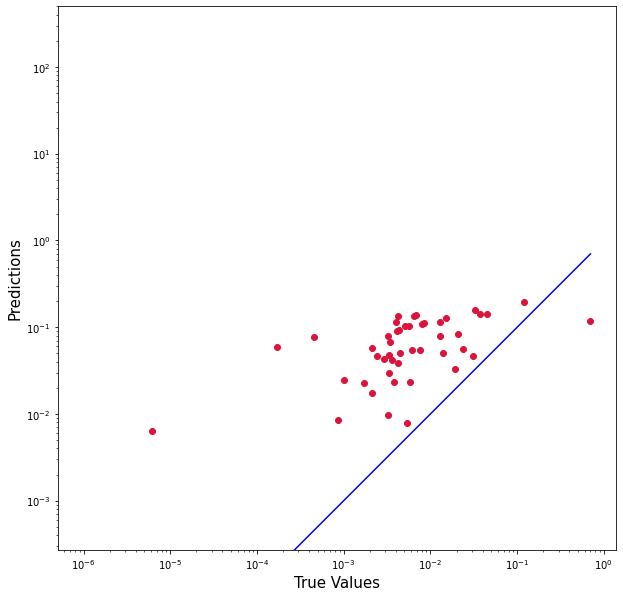

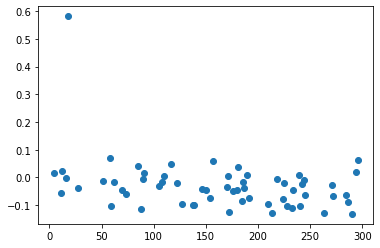

In [ ]:
# w=ridgeModel.coef_
# from sklearn.metrics import classification_report, confusion_matrix
# # accuracy = accuracy_score(Y_Actual,yhat)
# from sklearn.neighbors import KNeighborsRegressor

# from sklearn.neural_network import MLPClassifier
# nnet = KNeighborsRegressor()  ## How many hidden layers? How many neurons does this have?

# nnet.fit(X_train, y_train)

# predictions = nnet.predict(X_test)
# print(y_test)
# print(predictions)
# # Predict what the classes are based on the testing data


plt.figure(figsize=(10,10))
plt.scatter(y_test, ridgeRegressionPREDICTED, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(ridgeRegressionPREDICTED), max(y_test))
p2 = min(min(ridgeRegressionPREDICTED), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

g=plt.plot(y_test - ridgeRegressionPREDICTED,marker='o',linestyle='')


In [ ]:
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# print(X.shape, y.shape)

[-2.65164308e-02 -1.57932063e-02  1.99444044e-02  8.97502326e-02
 -2.18845334e-01  1.16061845e-01  2.57768764e-02 -1.36631800e-01
 -1.23327324e-03 -6.45415815e-02 -1.41389826e-01 -2.83114166e-01
 -2.11241841e-02 -1.16295463e-01  2.84074132e-02  6.30056035e-02
 -1.41120363e-01 -5.56773907e-02 -3.89965569e-02  8.62238996e-02
  9.81109841e-04 -5.55720979e-02  2.74010864e-02  1.00996850e-01
 -1.64621721e-02 -8.10364289e-05 -3.27343731e-01  1.24161180e-01
  5.26882816e-02 -2.20777102e-01  1.93151239e-02  1.77862360e-01
 -3.07643744e-02 -5.70275866e-02  1.38582636e-01 -1.42519313e-01
  7.12126474e-02 -1.54476890e-01  4.78766372e-02 -1.01781257e-01
 -8.43328296e-02  1.23934146e-02 -3.01915437e-02 -1.10975786e-01
 -3.76646468e-02  1.77588742e-01 -6.17267566e-02 -3.87355712e-02
 -3.65323652e-01 -1.11273497e-01  8.61044386e-02 -1.29991756e-02
 -2.07176333e-01 -5.46378853e-02 -1.74318388e-01  2.33542012e-01
 -8.61417741e-03 -3.23367453e-02  8.84736228e-03  5.83091921e-02]
[0.007899999999999999, 0

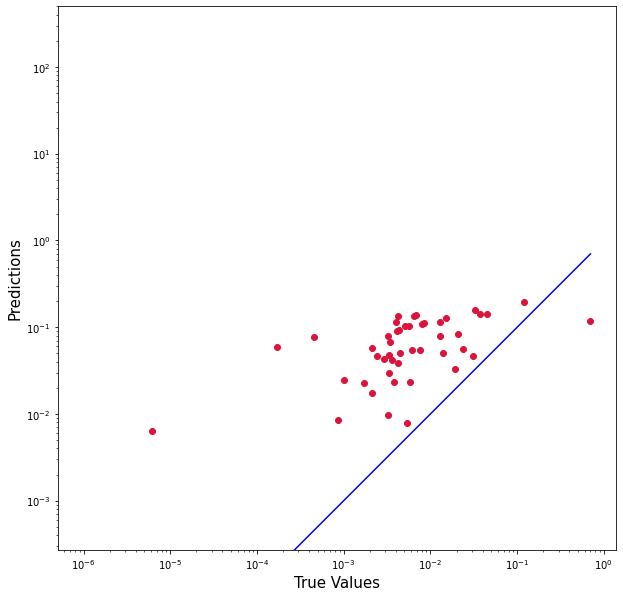

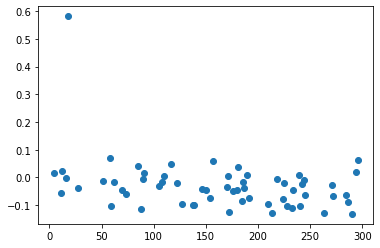

In [ ]:
from sklearn.neural_network import MLPRegressor
import numpy as np

neural_net = MLPRegressor(max_iter=1000).fit(X_train,y_train)
res = neural_net.predict(X_test)
print(res)
YTEST= y_test.tolist()
res = res.tolist()
print(YTEST)
print(res)
print(np.std(res))
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as mean_absolute_error


#calculate RMSE
print('RMSE'+str(sqrt(mean_squared_error(YTEST, res))))
print('MAE'+str(mean_absolute_error(YTEST, res)))

plt.figure(figsize=(10,10))
plt.scatter(y_test, yhat, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

g=plt.plot(y_test - yhat,marker='o',linestyle='')

